<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-и-предобработка-данных" data-toc-modified-id="Исследовательский-анализ-и-предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ и предобработка данных</a></span></li><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Объединение данных</a></span></li><li><span><a href="#Исследовательский-анализ-и-предобработка-данных-объединённого-датафрейма" data-toc-modified-id="Исследовательский-анализ-и-предобработка-данных-объединённого-датафрейма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ и предобработка данных объединённого датафрейма</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей-машинного-обучения" data-toc-modified-id="Обучение-моделей-машинного-обучения-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение моделей машинного обучения</a></span><ul class="toc-item"><li><span><a href="#Catboost" data-toc-modified-id="Catboost-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Catboost</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>LGBM</a></span></li></ul></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Общий-вывод-и-рекомендации-заказчику" data-toc-modified-id="Общий-вывод-и-рекомендации-заказчику-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод и рекомендации заказчику</a></span></li></ul></div>

# Проект: телекоммуникации

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. <br> Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. <br>Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. <br>
Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.

## Загрузка данных

In [1]:
!pip install scikit-learn==1.1.3
!pip install numpy
!pip install phik 
!pip install lightgbm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import timeit
import datetime as dt
from sklearn.compose import make_column_transformer
from phik.report import plot_correlation_matrix
from phik import report
from phik import phik_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    train_test_split
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    LabelEncoder
)
import warnings
warnings.filterwarnings("ignore")
import bisect

In [3]:
RANDOM_STATE = 100325
TEST_SIZE = 0.25

In [4]:
contract_new = pd.read_csv('/datasets/contract_new.csv', decimal = '.')
personal_new = pd.read_csv('/datasets/personal_new.csv')
internet_new = pd.read_csv('/datasets/internet_new.csv')
phone_new = pd.read_csv('/datasets/phone_new.csv')

In [5]:
# функция вывода информации о данных
def data_info(data):
    display(data.head(20))
    data.info()
    display(data.describe())

In [6]:
data_info(contract_new)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


В столбцах BeginDate, EndDate неверный формат -нужно исправить на дату. TotalCharges необходимо исправить на float

In [7]:
contract_new['BeginDate'] = pd.to_datetime(contract_new['BeginDate'], format='%Y-%m-%d')
#contract_new['EndDate'] = pd.to_datetime(contract_new['EndDate'], errors='coerce', format='%Y-%m-%d')

В EndDate много значений 'No', которые влияют на целевой признак(Закончили контракт или нет), поэтому и пропуски заполним, и формат поменяем на более позднем этапе.

In [8]:
contract_new['TotalCharges'] = pd.to_numeric(contract_new['TotalCharges'], errors='coerce').astype(float)

In [9]:
data_info(personal_new)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


В столбце 'SeniorCitizen' всего 2 значения - 0 и 1, преобразуем в категории 'Yes' и 'No':

In [10]:
personal_new.loc[personal_new['SeniorCitizen'] == 0, 'SeniorCitizen'] = 'No'
personal_new.loc[personal_new['SeniorCitizen'] == 1, 'SeniorCitizen'] = 'Yes'

In [11]:
data_info(internet_new)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,9831-BPFRI,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [12]:
data_info(phone_new)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,4462-CYWMH,No
freq,1,3390


В ходе 1 этапа загружены и изучены данные 4 датасетов, исправлен формат столбцов BeginDate, TotalCharges и представление 'SeniorCitizen'. 

## Исследовательский анализ и предобработка данных

In [13]:
def data_unique(data):
    for row in data.columns:
        if data[row].dtype==object:
            if row == 'customerID'or row == 'EndDate':
                continue
            else:
                print(f'Количество уникальных значений в столбце {row}:')
                print(len(data[row].unique()))
                print(data[row].value_counts())

In [14]:
data_unique(contract_new)

Количество уникальных значений в столбце Type:
3
Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64
Количество уникальных значений в столбце PaperlessBilling:
2
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
Количество уникальных значений в столбце PaymentMethod:
4
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [15]:
data_unique(personal_new)

Количество уникальных значений в столбце gender:
2
Male      3555
Female    3488
Name: gender, dtype: int64
Количество уникальных значений в столбце SeniorCitizen:
2
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64
Количество уникальных значений в столбце Partner:
2
No     3641
Yes    3402
Name: Partner, dtype: int64
Количество уникальных значений в столбце Dependents:
2
No     4933
Yes    2110
Name: Dependents, dtype: int64


In [16]:
data_unique(internet_new)

Количество уникальных значений в столбце InternetService:
2
Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64
Количество уникальных значений в столбце OnlineSecurity:
2
No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64
Количество уникальных значений в столбце OnlineBackup:
2
No     3088
Yes    2429
Name: OnlineBackup, dtype: int64
Количество уникальных значений в столбце DeviceProtection:
2
No     3095
Yes    2422
Name: DeviceProtection, dtype: int64
Количество уникальных значений в столбце TechSupport:
2
No     3473
Yes    2044
Name: TechSupport, dtype: int64
Количество уникальных значений в столбце StreamingTV:
2
No     2810
Yes    2707
Name: StreamingTV, dtype: int64
Количество уникальных значений в столбце StreamingMovies:
2
No     2785
Yes    2732
Name: StreamingMovies, dtype: int64


In [17]:
data_unique(phone_new)

Количество уникальных значений в столбце MultipleLines:
2
No     3390
Yes    2971
Name: MultipleLines, dtype: int64


In [18]:
def data_diagram(data):
    for row in data.columns:
        if data[row].dtype==object:
            if row == 'customerID' or row == 'EndDate':
                continue 
            else:
                ax = data[row].value_counts().plot(kind='pie', title = row, legend=True, ylabel='', labeldistance=None)
                ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
                plt.show()

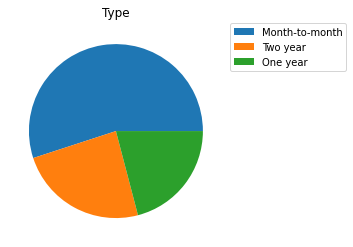

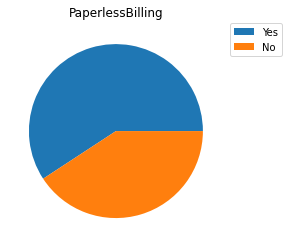

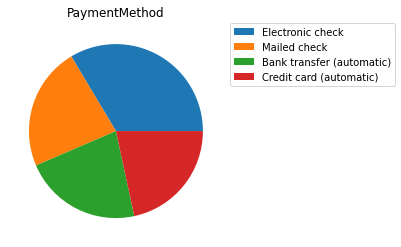

In [19]:
data_diagram(contract_new)

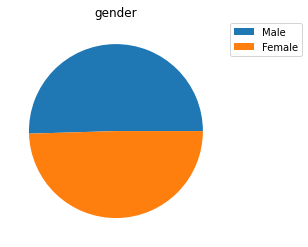

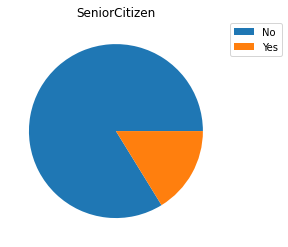

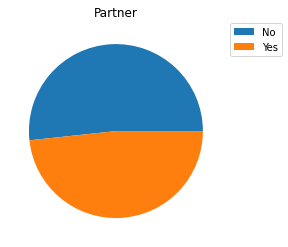

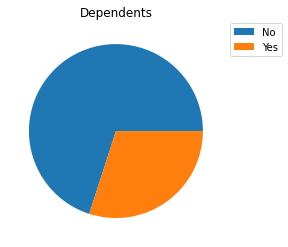

In [20]:
data_diagram(personal_new)

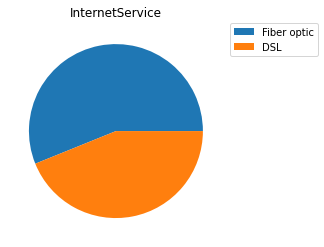

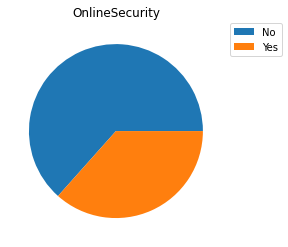

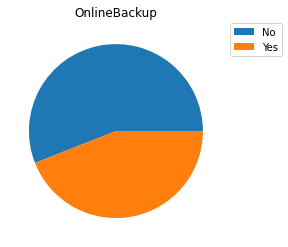

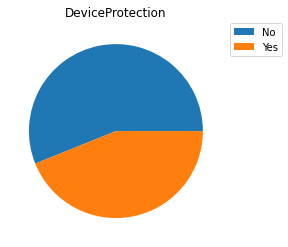

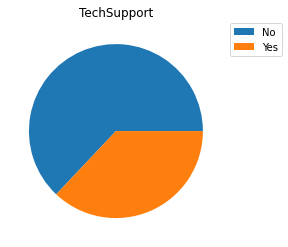

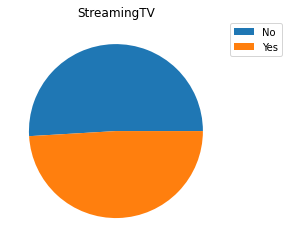

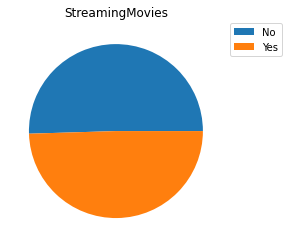

In [21]:
data_diagram(internet_new)

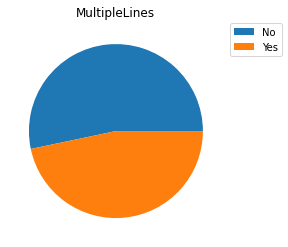

In [22]:
data_diagram(phone_new)

In [23]:
def data_hist(data):
    for row in data.columns:
        if data[row].dtype == int or data[row].dtype == float:
            plt.hist(data[row], bins = 50)
            plt.xlabel(row)
            plt.ylabel('count')
            plt.title(f'Распределение {row}')
            plt.show()

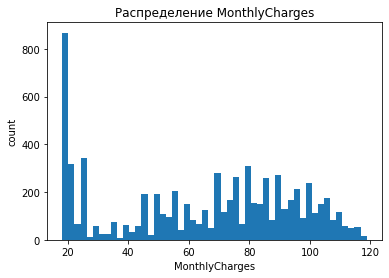

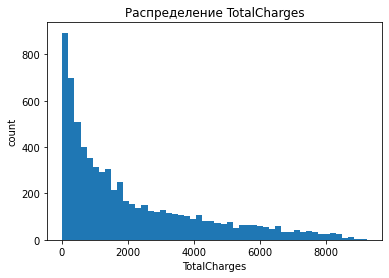

In [24]:
data_hist(contract_new)

In [25]:
# функция вывода пропусков и дупликатов
def data_dup_isna(data):
    print('Количество дупликатов')
    display(data.duplicated().sum())
    print('Количество пропусков')
    display(data.isna().sum())

In [26]:
data_dup_isna(contract_new)

Количество дупликатов


0

Количество пропусков


customerID           0
BeginDate            0
EndDate              0
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [27]:
contract_new['TotalCharges'] = contract_new['TotalCharges'].fillna(0)

In [28]:
data_dup_isna(contract_new)

Количество дупликатов


0

Количество пропусков


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [29]:
data_dup_isna(personal_new)

Количество дупликатов


0

Количество пропусков


customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [30]:
data_dup_isna(internet_new)

Количество дупликатов


0

Количество пропусков


customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [31]:
data_dup_isna(phone_new)

Количество дупликатов


0

Количество пропусков


customerID       0
MultipleLines    0
dtype: int64

Датафреймы не содержат дупликатов, пропуски в столбце TotalCharges устранены.<br>
В данных много категориальных признаков с распределением примерно 50/50.

## Объединение данных

In [32]:
data = personal_new.merge(contract_new, on ='customerID', how='inner')
data = data.merge(internet_new, on ='customerID', how = 'outer')
data = data.merge(phone_new, on ='customerID', how = 'outer')
data_info(data)

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,No,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,Male,No,No,No,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,No,No,No,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,No,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Female,No,No,No,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,Fiber optic,No,No,No,No,No,No,No
5,9305-CDSKC,Female,No,No,No,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,1452-KIOVK,Male,No,No,Yes,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,Female,No,No,No,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,DSL,Yes,No,No,No,No,No,NaN
8,7892-POOKP,Female,No,Yes,No,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,Male,No,No,Yes,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,DSL,Yes,Yes,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   gender            7043 non-null   object        
 2   SeniorCitizen     7043 non-null   object        
 3   Partner           7043 non-null   object        
 4   Dependents        7043 non-null   object        
 5   BeginDate         7043 non-null   datetime64[ns]
 6   EndDate           7043 non-null   object        
 7   Type              7043 non-null   object        
 8   PaperlessBilling  7043 non-null   object        
 9   PaymentMethod     7043 non-null   object        
 10  MonthlyCharges    7043 non-null   float64       
 11  TotalCharges      7043 non-null   float64       
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2115.312885
std,30.090047,2112.742814
min,18.250000,0.000000
25%,35.500000,436.750000
50%,70.350000,1343.350000
75%,89.850000,3236.690000
max,118.750000,9221.380000


## Исследовательский анализ и предобработка данных объединённого датафрейма

In [33]:
data_dup_isna(data)

Количество дупликатов


0

Количество пропусков


customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

In [34]:
# Создание целевого признака 'Broken_contract' (закончен ли договор с компанией Теледом)
data['Broken_contract'] = 1
data.loc[data['EndDate'] == 'No', 'Broken_contract'] = 0

In [35]:
# '2020-02-01' - дата выгрузки датасета
data.loc[data['EndDate'] == 'No', 'EndDate'] = '2020-02-01'
data['EndDate'] = pd.to_datetime(data['EndDate'], format='%Y-%m-%d')

In [36]:
# Создание признака 'Duration_contract' (продолжительность контракта)
data['Duration_contract'] = (data['EndDate'] - data['BeginDate']).dt.components.days

# Удаление признаков 'BeginDate' и 'EndDate' и идентификатора 'customerID'
data = data.drop(['BeginDate', 'EndDate','customerID'], axis=1)

In [37]:
# Заполнение пропусков после объединения таблиц
data = data.fillna('No')

In [38]:
data_dup_isna(data)

Количество дупликатов


4

Количество пропусков


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
MultipleLines        0
Broken_contract      0
Duration_contract    0
dtype: int64

In [39]:
data[data.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Broken_contract,Duration_contract
1491,Female,No,No,No,Month-to-month,No,Mailed check,19.55,19.55,No,No,No,No,No,No,No,No,0,31
2892,Male,No,No,No,Month-to-month,No,Mailed check,20.45,20.45,No,No,No,No,No,No,No,No,0,31
4797,Male,No,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8211.60,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,2191
5024,Male,No,Yes,No,Two year,No,Mailed check,25.40,1828.80,No,No,No,No,No,No,No,Yes,0,2191


In [40]:
data[data.duplicated()].shape[0] / data.shape[0]

0.0005679397983813716

Удалим дупликаты из датасета, поскольку их количество составляет меньше 1%

In [41]:
data = data.drop_duplicates()

In [42]:
data_info(data)

,gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Broken_contract,Duration_contract
0,Female,No,Yes,No,Month-to-month,Yes,Electronic check,29.85,31.04,DSL,No,Yes,No,No,No,No,No,0,31
1,Male,No,No,No,One year,No,Mailed check,56.95,2071.84,DSL,Yes,No,Yes,No,No,No,No,0,1036
2,Male,No,No,No,Month-to-month,Yes,Mailed check,53.85,226.17,DSL,Yes,Yes,No,No,No,No,No,0,123
3,Male,No,No,No,One year,No,Bank transfer (automatic),42.30,1960.60,DSL,Yes,No,Yes,Yes,No,No,No,0,1371
4,Female,No,No,No,Month-to-month,Yes,Electronic check,70.70,353.50,Fiber optic,No,No,No,No,No,No,No,0,153
5,Female,No,No,No,Month-to-month,Yes,Electronic check,99.65,1150.96,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,0,337
6,Male,No,No,Yes,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Fiber optic,No,Yes,No,No,Yes,No,Yes,0,671
7,Female,No,No,No,Month-to-month,No,Mailed check,29.75,300.48,DSL,Yes,No,No,No,No,No,No,0,306
8,Female,No,Yes,No,Month-to-month,Yes,Electronic check,104.80,3573.68,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,0,945
9,Male,No,No,Yes,One year,No,Bank transfer (automatic),56.15,1628.35,DSL,Yes,Yes,No,No,No,No,No,1,882


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7039 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7039 non-null   object 
 1   SeniorCitizen      7039 non-null   object 
 2   Partner            7039 non-null   object 
 3   Dependents         7039 non-null   object 
 4   Type               7039 non-null   object 
 5   PaperlessBilling   7039 non-null   object 
 6   PaymentMethod      7039 non-null   object 
 7   MonthlyCharges     7039 non-null   float64
 8   TotalCharges       7039 non-null   float64
 9   InternetService    7039 non-null   object 
 10  OnlineSecurity     7039 non-null   object 
 11  OnlineBackup       7039 non-null   object 
 12  DeviceProtection   7039 non-null   object 
 13  TechSupport        7039 non-null   object 
 14  StreamingTV        7039 non-null   object 
 15  StreamingMovies    7039 non-null   object 
 16  MultipleLines      7039 

,MonthlyCharges,TotalCharges,Broken_contract,Duration_contract
count,7039.000000,7039.000000,7039.000000,7039.000000
mean,64.773000,2115.082860,0.156414,898.435005
std,30.079738,2111.795254,0.363273,682.820576
min,18.250000,0.000000,0.000000,0.000000
25%,35.550000,437.500000,0.000000,276.000000
50%,70.350000,1343.350000,0.000000,761.000000
75%,89.850000,3236.690000,0.000000,1461.000000
max,118.750000,9221.380000,1.000000,2314.000000


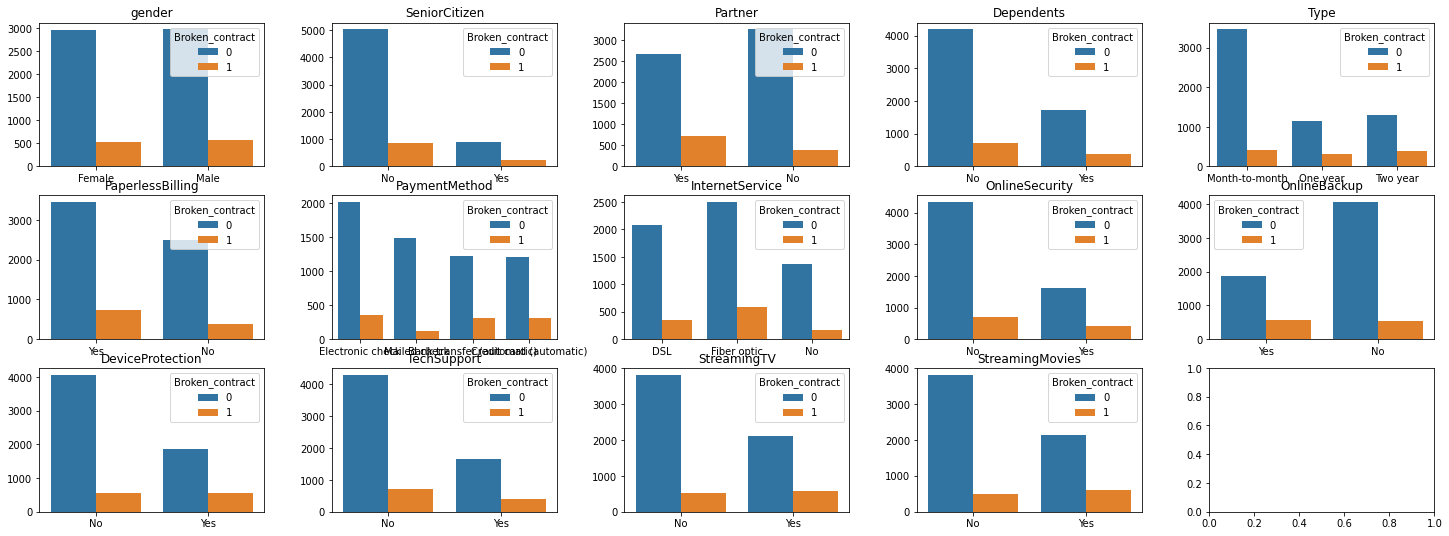

In [43]:
columns = data.columns[data.dtypes == object][:-1].to_list()
fig, axes = plt.subplots(3, 5, figsize=(25, 9), gridspec_kw={'wspace': 0.3})

for column, ax in zip(columns, axes.flat):
    sns.countplot(column, hue='Broken_contract', data=data, ax=ax).set_title(column)
    
plt.setp(axes, xlabel=None, ylabel=None)

plt.show()

* Cильной зависимости по gender, StreamingTV, StreamingMovies  нет 
* Пенсионеры чаще уходят, но и чаще остаются клиентами - похоже, что они наша целевая группа
* У ушедших клиентов часто есть партнер, но нет детей
* Тип подписки не сильно влияет на разрыв контракта, но можем заметить, что месячная сильно популярнее - возможно имеет смысл развивать другие типы
* Клиенты с типом оплаты mailed check реже уходят из компании - возможно стоит исключать ошибки при оплате/добавить автоплатежи для других типов оплаты
* Клиенты с типом подключения Fiber optic чаще уходят из компании, стоит провреить качество услуги/увеличить тех. поддержку
* Блокировка опасных сайтов, облачное хранилище, антивирус не заставляют людей оставаться - множество оставшихся клиентов не имеют данных услуг
* Те, кто не имеют выделенной линии тех. поддержки чуть чаще уходят из компании - возможно стоит ввести как дополнительную акцию для некоторых клиентов

In [44]:
data.corr()

,MonthlyCharges,TotalCharges,Broken_contract,Duration_contract
MonthlyCharges,1.000000,0.630181,0.154229,0.219729
TotalCharges,0.630181,1.000000,0.052263,0.821857
Broken_contract,0.154229,0.052263,1.000000,0.016668
Duration_contract,0.219729,0.821857,0.016668,1.000000


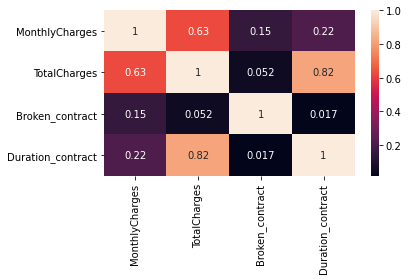

In [45]:
sns.heatmap(data.corr(), annot=True)
plt.tight_layout()
plt.show()

In [46]:
multicollinearity = data.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'Duration_contract'])
display(multicollinearity)

,gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Broken_contract,Duration_contract
gender,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011139,0.000000,0.000000,0.018711,0.010208,0.000000,0.000000,0.000000,0.000000,0.000000,0.009029,0.000000
SeniorCitizen,0.000000,1.000000,0.017018,0.324714,0.086227,0.241965,0.292447,0.304566,0.135556,0.160675,0.057080,0.102017,0.090634,0.092630,0.163061,0.186086,0.221451,0.085995,0.063165
Partner,0.000000,0.017018,1.000000,0.652047,0.179447,0.013973,0.242734,0.202848,0.381439,0.000000,0.221312,0.218884,0.237751,0.185611,0.192916,0.181663,0.219337,0.226776,0.452940
Dependents,0.000000,0.324714,0.652047,1.000000,0.147569,0.173503,0.225051,0.185006,0.083553,0.108940,0.124192,0.030631,0.008694,0.096138,0.018471,0.059844,0.033672,0.046841,0.198278
Type,0.000000,0.086227,0.179447,0.147569,1.000000,0.107076,0.277436,0.388089,0.470487,0.505769,0.152033,0.098759,0.137506,0.179905,0.066827,0.069476,0.065094,0.094073,0.633814
PaperlessBilling,0.000000,0.241965,0.013973,0.173503,0.107076,1.000000,0.369684,0.467018,0.201023,0.231074,0.000000,0.195733,0.160059,0.055117,0.342904,0.324912,0.252784,0.083159,0.025643
PaymentMethod,0.000000,0.292447,0.242734,0.225051,0.277436,0.369684,1.000000,0.398906,0.335398,0.323494,0.262288,0.281685,0.306078,0.271486,0.376595,0.378272,0.339329,0.214624,0.350860
MonthlyCharges,0.011139,0.304566,0.202848,0.185006,0.388089,0.467018,0.398906,1.000000,0.710666,0.918958,0.551057,0.629107,0.667261,0.575646,0.835016,0.833180,0.676215,0.225959,0.386862
TotalCharges,0.000000,0.135556,0.381439,0.083553,0.470487,0.201023,0.335398,0.710666,1.000000,0.489766,0.521627,0.622058,0.640606,0.549594,0.641133,0.642858,0.572850,0.302751,0.848304
InternetService,0.000000,0.160675,0.000000,0.108940,0.505769,0.231074,0.323494,0.918958,0.489766,1.000000,0.241361,0.233419,0.232729,0.239594,0.272610,0.272574,0.225361,0.056527,0.060400


Признаки нет смысла исключать - зависимость от целевого признака есть, хоть и небольшая, а признаков в общем числе не так много.

## Подготовка данных

In [47]:
features = data.drop(['Broken_contract'], axis=1)
target = data['Broken_contract']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

In [49]:
le = LabelEncoder()
to_encode = ['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'PaymentMethod', 'TechSupport', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'Type', 'gender', 'StreamingTV', 'StreamingMovies']
for column in to_encode:
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = X_test[column].map(lambda s: 'other' if s not in le.classes_ else s)
    le_classes = le.classes_.tolist()
    bisect.insort_left(le_classes, 'other')
    le.classes_ = le_classes
    X_test[column] = le.transform(X_test[column])
X_test.head(5)

,gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Duration_contract
5298,0,1,1,0,0,1,2,105.90,6417.54,1,0,1,1,0,1,1,1,1826
4413,0,1,0,0,0,1,2,89.15,1604.70,1,0,1,1,0,1,0,0,549
1102,1,0,1,1,0,1,3,56.15,400.91,0,0,1,1,0,0,0,0,215
4499,0,0,0,1,0,1,2,78.30,1017.90,1,1,0,0,0,0,0,1,396
2559,1,0,1,0,2,1,2,115.55,9068.36,1,1,1,1,1,1,1,1,2191


In [50]:
num_col = X_train.select_dtypes(include='number').columns.tolist()
cat_col = X_train.select_dtypes(exclude='number').columns.tolist()

## Обучение моделей машинного обучения

### Catboost

In [51]:
catboost_model = CatBoostClassifier(cat_features=cat_col,
                                   random_state=RANDOM_STATE,
                                   logging_level='Silent',
                                   loss_function='Logloss')

In [52]:
parameters_c = {'max_depth': np.arange(4, 11),
                  'learning_rate':[0.01, 0.1, 1],
                  'iterations': [1000,2000]}
catboost_grid = GridSearchCV(catboost_model,
                             parameters_c,
                             cv=3,
                             scoring='roc_auc').fit(X_train, y_train)

In [53]:
roc = catboost_grid.best_score_
roc

0.9109789386407859

Catboost на тренировочной выборке показал результат roc-auc = 0.91.

### RandomForest

In [54]:
grid_params = {
    'n_estimators': np.arange(40, 100, 10),
    'max_depth' : np.arange(12, 24)
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE), grid_params, cv=3, scoring='roc_auc').fit(X_train, y_train)

In [55]:
grid_rf.best_score_

0.821787989916486

RandomForest на тренировочной выборке показал результат roc-auc = 0.82.

### LGBM

In [56]:
model_lgbm = LGBMClassifier(random_state=RANDOM_STATE)
parameters_lgbm = {'max_depth': np.arange(4, 11),
                  'learning_rate':[0.01, 0.1, 1]}
lgbm = GridSearchCV(model_lgbm, 
                            parameters_lgbm, 
                            cv = 3,
                            scoring='roc_auc').fit(X_train, y_train)

In [57]:
lgbm.best_score_

0.8590225144498244

LGBM на тренировочной выборке показал результат roc-auc = 0.86.

## Выбор лучшей модели

Лучше всего показала себя модель CatBoost, проверим ее на тестовой выборке:

In [58]:
catboost_grid.best_params_

{'iterations': 2000, 'learning_rate': 0.1, 'max_depth': 4}

In [65]:
model = CatBoostClassifier(logging_level='Silent',
                           loss_function='Logloss',
                           iterations = 2000, 
                           learning_rate = 0.1, 
                           max_depth = 4).fit(X_train, y_train)
predictions = model.predict(X_test)

In [66]:
predict = catboost_grid.predict(X_test)
predict_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, predict_proba[:, 1])

In [67]:
roc_auc

0.9018867835014375

##  Общий вывод и рекомендации заказчику

В ходе работы были изучены, исследованы и подготовлены данные о компании Теледом. <br>
Лучшая модель - Catboost c параметрами {'iterations': 2000, 'learning_rate': 0.1, 'max_depth': 4} <br>
Модель предсказания оттока клиентов из компании Теледом показала результат roc_auc=0.90, что является хорошим результатом.<br>
Возможно для более высокой точности необходимо собрать больше данных для анализа, например через опрос пользователей <br>
Выделены некоторые рекомендации для Заказчика:
* Пенсионеры - целевая группа, стоит это учитывать
* Тип подписки не сильно влияет на разрыв контракта, но можем заметить, что месячная сильно популярнее - возможно имеет смысл развивать другие типы
* Клиенты с типом оплаты mailed check реже уходят из компании - возможно стоит исключать ошибки при оплате/добавить автоплатежи для других типов оплаты
* Клиенты с типом подключения Fiber optic чаще уходят из компании, стоит провреить качество услуги/увеличить тех. поддержку
* Блокировка опасных сайтов, облачное хранилище, антивирус не заставляют людей оставаться - множество оставшихся клиентов не имеют данных услуг. <br> Возможно они пользуются этими услугами у других компаний - нужно провести анализ рынка, изменить стоимость/увеличить рекламу данных услуг
* Те, кто не имеют выделенной линии тех. поддержки чуть чаще уходят из компании - возможно стоит ввести как дополнительную акцию для некоторых клиентов